Datasets:

Variables del dataset:

- id: ID de la solicitud

- amount: Cantidad solicitada.

- status: Estado de la solicitud.

- created_at: Fecha de creación de la solucitud.

- user_id: ID del usuario que ha realizado la solicitud.

- money_back_date: Fecha en la que el usuario ha devuelto el dinero.

- transfer_type: Tipo de transferencia.
- send_at: Fecha en la que NUWE CASH envia el dinero al usuario.



Se debe realizar un analisis exploratorio de los datos que permita conocer los siguientes insights:

- Número de nuevos usarios por mes.
- Dinero total solicitado cada mes.
- Dinero medio solicitado por cada usuario al mes.
- Porcentaje de las solicitudes que son aceptadas cada mes.
- Número de solicitudes al mes que son aceptadas pero NO son devueltas.
- Número de solicitudes al mes que son aceptadas y SÍ son devueltas.
- Tiempo medio en devolver un préstamo (MM:DD:HH).
- Cantidad de dinero que se presta cada mes.
- Predecir la cantidad de dinero que se solicitara en Octubre.

In [258]:
import pandas as pd
from datetime import datetime


In [259]:
URL='https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/jump2digital/presencial/dataset/J2D_train.csv'

In [563]:
df= pd.read_csv(URL)

In [261]:
df

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00
...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00,NaN,NaN,instant,2020-08-31 00:33:58.824223+00
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00,2562.0,2020-06-13 00:16:39.223405+00,regular,NaN
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00,NaN,NaN,regular,NaN


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16105 non-null  int64  
 1   amount           16105 non-null  float64
 2   status           16105 non-null  object 
 3   created_at       16105 non-null  object 
 4   user_id          14218 non-null  float64
 5   money_back_date  9498 non-null   object 
 6   transfer_type    16105 non-null  object 
 7   send_at          8776 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1006.7+ KB


In [263]:
 df.describe()

,id,amount,user_id
count,16105.000000,16105.000000,14218.000000
mean,9577.939770,87.722384,19328.963075
std,5495.677337,22.546287,13770.497673
min,3.000000,1.000000,34.000000
25%,4614.000000,80.000000,8074.000000
50%,9937.000000,100.000000,17029.500000
75%,14369.000000,100.000000,29726.500000
max,18614.000000,200.000000,57362.000000


In [264]:
df.isnull().sum()

id                    0
amount                0
status                0
created_at            0
user_id            1887
money_back_date    6607
transfer_type         0
send_at            7329
dtype: int64

In [567]:
df['date']= pd.to_datetime(df['created_at'])

In [266]:
df['year']=df['date'].dt.year

In [267]:
df['month']=df['date'].dt.month

In [270]:
df

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,date,year,month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN,2020-06-20 16:46:28.409042+00:00,2020,6
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00,2020-08-19 16:20:22.768375+00:00,2020,8
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00,2020-08-11 13:23:12.220906+00:00,2020,8
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00,2020-08-07 11:01:30.519340+00:00,2020,8
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00,2020-09-18 13:08:34.789948+00:00,2020,9
...,...,...,...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00,2020-08-20 07:23:33.760027+00:00,2020,8
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00,NaN,NaN,instant,2020-08-31 00:33:58.824223+00,2020-08-24 00:33:58.853099+00:00,2020,8
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00,2562.0,2020-06-13 00:16:39.223405+00,regular,NaN,2020-05-02 08:54:49.586739+00:00,2020,5
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00,NaN,NaN,regular,NaN,2020-07-08 12:56:16.163418+00:00,2020,7


In [271]:
df.groupby(['year','month'])['id'].count()

year  month
2019  11          1
      12        289
2020  1         223
      2         184
      3         244
      4         473
      5         837
      6        2615
      7        3601
      8        3417
      9        4221
Name: id, dtype: int64

In [272]:
df[df.isnull()].groupby(['year','month'])['user_id'].count()

Series([], Name: user_id, dtype: int64)

# Q1: Numero nuevos usuarios

In [274]:
df_nn = df.loc[~df['user_id'].isnull()].copy()

In [275]:
df_wn = df.loc[df['user_id'].isnull()].copy()

In [276]:
df_nn_ordered=df_nn.sort_values(by='date')


In [277]:
newclientbymonth=df_nn_ordered.groupby('user_id').first().groupby(['year','month']).count()['id']

In [278]:
newclientbymonth

year  month
2019  11          1
      12        204
2020  1          90
      2          84
      3          69
      4         212
      5         369
      6        1338
      7        1294
      8         656
      9        1712
Name: id, dtype: int64

# Dinero total solicitato 

In [279]:
df_nn['id'].value_counts().sort_values()

2049     1
16440    1
10469    1
14359    1
8196     1
        ..
2031     1
14329    1
12282    1
6109     1
2047     1
Name: id, Length: 14218, dtype: int64

In [280]:
TotalSum=df['amount'].sum()

In [281]:
TotalSum

1412769.0

In [282]:
df['amount'].sum()

1412769.0

In [283]:
totalSum=df.groupby(['year','month'])['amount'].sum().reset_index()

In [284]:
totalSum

,year,month,amount
0,2019,11,1.0
1,2019,12,27297.0
2,2020,1,21587.0
3,2020,2,16653.0
4,2020,3,23549.0
5,2020,4,46093.0
6,2020,5,79236.0
7,2020,6,246026.0
8,2020,7,328187.0
9,2020,8,287633.0


# Dinero medio solicitato por cada usuario al mes 

In [285]:
usuarioId=df_nn.groupby(['year','month'])['user_id'].nunique().reset_index()

In [286]:
usuarioNoId=df_wn.groupby(['year','month'])['id'].count().reset_index()

In [287]:
usuarioTotal=pd.merge(usuarioId, usuarioNoId, on=['year','month'], how='left').fillna(0)

In [288]:
usuarioTotal['totalUser']=usuarioTotal['user_id'] + usuarioTotal['id']

In [289]:
AvgByUser=totalSum.copy()

In [290]:
AvgByUser['amount']=AvgByUser['amount']/usuarioTotal['totalUser']

In [291]:
AvgByUser

,year,month,amount
0,2019,11,1.000000
1,2019,12,103.397727
2,2020,1,104.791262
3,2020,2,95.706897
4,2020,3,107.040909
5,2020,4,108.709906
6,2020,5,106.214477
7,2020,6,111.880855
8,2020,7,114.750699
9,2020,8,106.098488


Porcentaje de las solicitudes que son aceptadas cada mes

# % de acceptados cada mes

In [292]:
grouped_object=df.groupby(['year','month'], dropna=False)

In [293]:
grouped_object['status'].value_counts()

year  month  status  
2019  11     rejected       1
      12     approved     179
             rejected     110
2020  1      rejected     112
             approved     111
      2      approved     112
             rejected      72
      3      approved     169
             rejected      75
      4      approved     323
             rejected     150
      5      approved     610
             rejected     227
      6      approved    1649
             rejected     966
      7      approved    2015
             rejected    1586
      8      approved    2026
             rejected    1391
      9      approved    2772
             rejected    1449
Name: status, dtype: int64

In [294]:
acceptedPercentage=grouped_object['status'].count().reset_index()

In [884]:
acceptedPercentage

,year,month,status
0,2019,11,1
1,2019,12,289
2,2020,1,223
3,2020,2,184
4,2020,3,244
5,2020,4,473
6,2020,5,837
7,2020,6,2615
8,2020,7,3601
9,2020,8,3417


In [891]:
test=round(grouped_object['status'].value_counts()/grouped_object['status'].count(),2)

In [892]:
test.

year  month  status  
2019  11     rejected    1.00
      12     approved    0.62
             rejected    0.38
2020  1      rejected    0.50
             approved    0.50
      2      approved    0.61
             rejected    0.39
      3      approved    0.69
             rejected    0.31
      4      approved    0.68
             rejected    0.32
      5      approved    0.73
             rejected    0.27
      6      approved    0.63
             rejected    0.37
      7      approved    0.56
             rejected    0.44
      8      approved    0.59
             rejected    0.41
      9      approved    0.66
             rejected    0.34
Name: status, dtype: float64

# Número de solicitudes al mes que son aceptadas pero NO son devueltas.


In [296]:
mask=(df['money_back_date'].isna()) &  (df['status']=='approved')

df[mask].groupby(['year','month']).count()['id'].reset_index()

,year,month,id
0,2019,12,142
1,2020,1,36
2,2020,2,39
3,2020,3,1
4,2020,4,1
5,2020,6,10
6,2020,7,64
7,2020,8,67
8,2020,9,109


# Número de solicitudes al mes que son aceptadas pero son devueltas.


In [297]:
mask=(df['money_back_date'].notnull()) &  (df['status']=='approved')


In [298]:
df[mask].groupby(['year','month']).count()['id']

year  month
2019  12         37
2020  1          75
      2          73
      3         168
      4         322
      5         610
      6        1639
      7        1951
      8        1959
      9        2663
Name: id, dtype: int64

In [299]:
df[mask].head()

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,date,year,month
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00,2020-08-19 16:20:22.768375+00:00,2020,8
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00,2020-08-11 13:23:12.220906+00:00,2020,8
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00,2020-08-07 11:01:30.519340+00:00,2020,8
6,13637,50.0,approved,2020-08-22 21:49:07.20549+00,4604.0,2020-09-08 19:27:06.237009+00,instant,2020-08-29 21:49:07.158273+00,2020-08-22 21:49:07.205490+00:00,2020,8
8,12784,100.0,approved,2020-08-17 11:35:13.8091+00,8231.0,2020-09-03 19:00:15.188417+00,regular,2020-08-24 11:35:13.744489+00,2020-08-17 11:35:13.809100+00:00,2020,8


# Tiempo medio en devolver un préstamo (MM:DD:HH).


In [300]:
df['money_back_dateDate']= pd.to_datetime(df['money_back_date'])

In [301]:
df['tiempo_delta']= df['money_back_dateDate']  - df['date']

In [302]:
df[df['tiempo_delta'].notnull()].mean()['tiempo_delta']

<ipython-input-302-f1d5824a5980>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['tiempo_delta'].notnull()].mean()['tiempo_delta']


Timedelta('37 days 09:44:20.265354216')

In [303]:
mask= (df.status == 'approved') &( df['tiempo_delta'].notnull())
df[mask].mean()['tiempo_delta']

<ipython-input-303-57c0a7971831>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[mask].mean()['tiempo_delta']


Timedelta('37 days 09:45:31.788799434')

# Cantidad de dinero que se presta cada mes.


In [304]:
df.groupby(['year','month'])['amount'].sum()

year  month
2019  11            1.0
      12        27297.0
2020  1         21587.0
      2         16653.0
      3         23549.0
      4         46093.0
      5         79236.0
      6        246026.0
      7        328187.0
      8        287633.0
      9        336507.0
Name: amount, dtype: float64

In [305]:
df

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,date,year,month,money_back_dateDate,tiempo_delta
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN,2020-06-20 16:46:28.409042+00:00,2020,6,NaT,NaT
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00,2020-08-19 16:20:22.768375+00:00,2020,8,2020-09-24 22:23:28.213168+00:00,36 days 06:03:05.444793
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00,2020-08-11 13:23:12.220906+00:00,2020,8,2020-11-19 23:00:00+00:00,100 days 09:36:47.779094
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00,2020-08-07 11:01:30.519340+00:00,2020,8,2020-08-29 22:12:23.812361+00:00,22 days 11:10:53.293021
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00,2020-09-18 13:08:34.789948+00:00,2020,9,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00,2020-08-20 07:23:33.760027+00:00,2020,8,NaT,NaT
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00,NaN,NaN,instant,2020-08-31 00:33:58.824223+00,2020-08-24 00:33:58.853099+00:00,2020,8,NaT,NaT
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00,2562.0,2020-06-13 00:16:39.223405+00,regular,NaN,2020-05-02 08:54:49.586739+00:00,2020,5,2020-06-13 00:16:39.223405+00:00,41 days 15:21:49.636666
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00,NaN,NaN,regular,NaN,2020-07-08 12:56:16.163418+00:00,2020,7,NaT,NaT


In [306]:
mask= (df['status']=='approved')

In [307]:
round(df[mask].groupby(['year','month'],dropna=False).sum()['amount'])

year  month
2019  12        16849.0
2020  1         10579.0
      2         10725.0
      3         16200.0
      4         31333.0
      5         57703.0
      6        154133.0
      7        184541.0
      8        179786.0
      9        234073.0
Name: amount, dtype: float64

In [309]:
df.head()

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,date,year,month,money_back_dateDate,tiempo_delta
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN,2020-06-20 16:46:28.409042+00:00,2020,6,NaT,NaT
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00,2020-08-19 16:20:22.768375+00:00,2020,8,2020-09-24 22:23:28.213168+00:00,36 days 06:03:05.444793
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00,2020-08-11 13:23:12.220906+00:00,2020,8,2020-11-19 23:00:00+00:00,100 days 09:36:47.779094
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00,2020-08-07 11:01:30.519340+00:00,2020,8,2020-08-29 22:12:23.812361+00:00,22 days 11:10:53.293021
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00,2020-09-18 13:08:34.789948+00:00,2020,9,NaT,NaT


In [311]:
columnName=['Name','UID','totalUsers','newUsers','uniqueUsers','requestedAmount','percPerUserAmount','acceptedPaid','acceptedUnpaid','returnTime','realBudget','predictedBudget']

In [312]:
usuarioTotal['totalUser']

0        1.0
1      264.0
2      206.0
3      174.0
4      220.0
5      424.0
6      746.0
7     2199.0
8     2860.0
9     2711.0
10    3742.0
Name: totalUser, dtype: float64

In [945]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'


In [961]:
timeSeriesDF_day=pd.DataFrame()

In [962]:
timeSeriesDF_day['date']=df['date']

In [963]:
timeSeriesDF_day['amount']=df['amount']

In [964]:
timeSeriesDF_day['year']=timeSeriesDF_day['date'].dt.year

In [965]:
timeSeriesDF_day['month']=timeSeriesDF_day['date'].dt.month

In [966]:
timeSeriesDF_day['day']=timeSeriesDF_day['date'].dt.day

In [967]:
timeSeriesDF_day['ymd']=timeSeriesDF_day['year'].astype('str')+'-'+timeSeriesDF_day['month'].astype('str')+'-'+timeSeriesDF_day['day'].astype('str')

In [968]:
timeSeriesDF_day['ymd']=pd.to_datetime(timeSeriesDF_day['ymd'])

In [969]:
timeSeriesDF_day=timeSeriesDF_day.groupby(['ymd']).sum().reset_index()

In [970]:
totalByDay=timeSeriesDF_day.set_index(['ymd'] ).asfreq('D')

In [971]:
totalByDay.head(175)

,amount,year,month,day
ymd,,,,
2019-11-19,1.0,2019.0,11.0,19.0
2019-11-20,NaN,NaN,NaN,NaN
2019-11-21,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-23,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-05-07,1490.0,32320.0,80.0,112.0
2020-05-08,1691.0,36360.0,90.0,144.0
2020-05-09,1600.0,32320.0,80.0,144.0


In [972]:
totalByDay=totalByDay.drop(['year','month','day'], axis=1)

In [973]:
totalByDay.drop(index=totalByDay.index[0:20], 
        axis=0, 
        inplace=True)

<AxesSubplot:xlabel='ymd'>

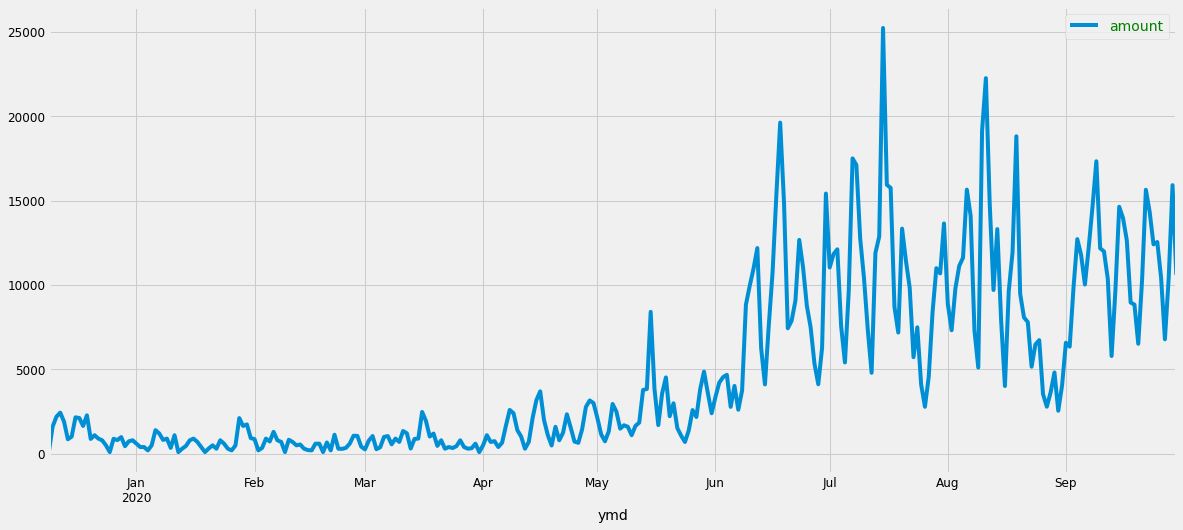

In [974]:
totalByDay.plot()

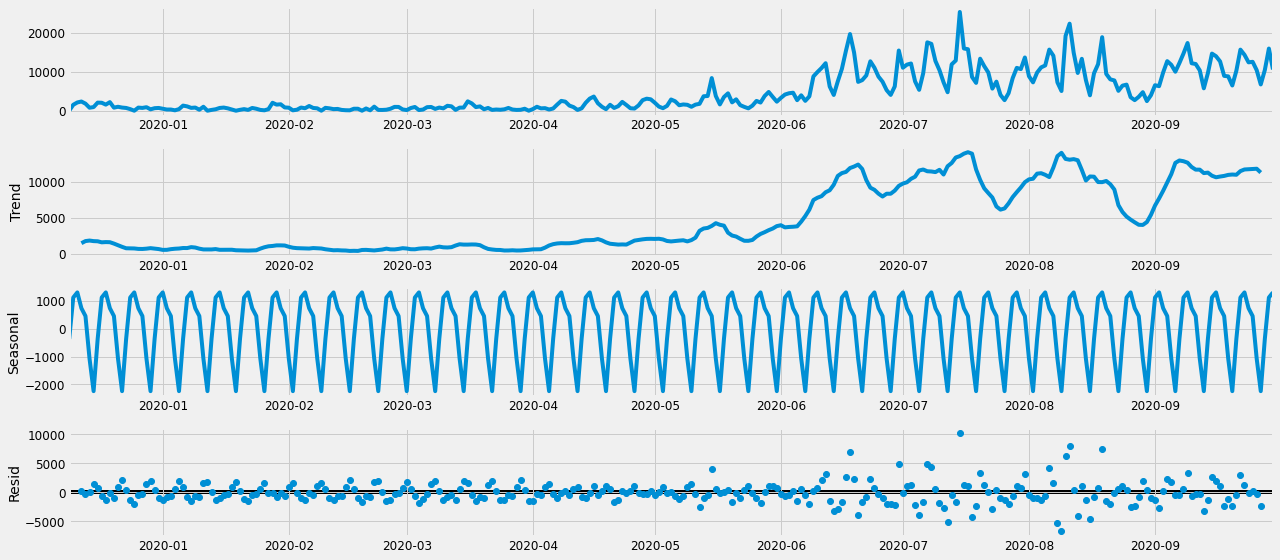

In [975]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(totalByDay, model='additive')
fig = decomposition.plot()
plt.show()

In [919]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(totalByDay)

In [920]:
adf

-1.1321995248050678

In [921]:
pvalue

0.7020618275391763

In [648]:
totalByDay.isnull().sum()


amount    0
dtype: int64

In [895]:
diffTotalByDay= pd.DataFrame()

In [896]:
diffTotalByDay['amount']=totalByDay['amount']-totalByDay['amount'].shift(7)


<AxesSubplot:xlabel='ymd'>

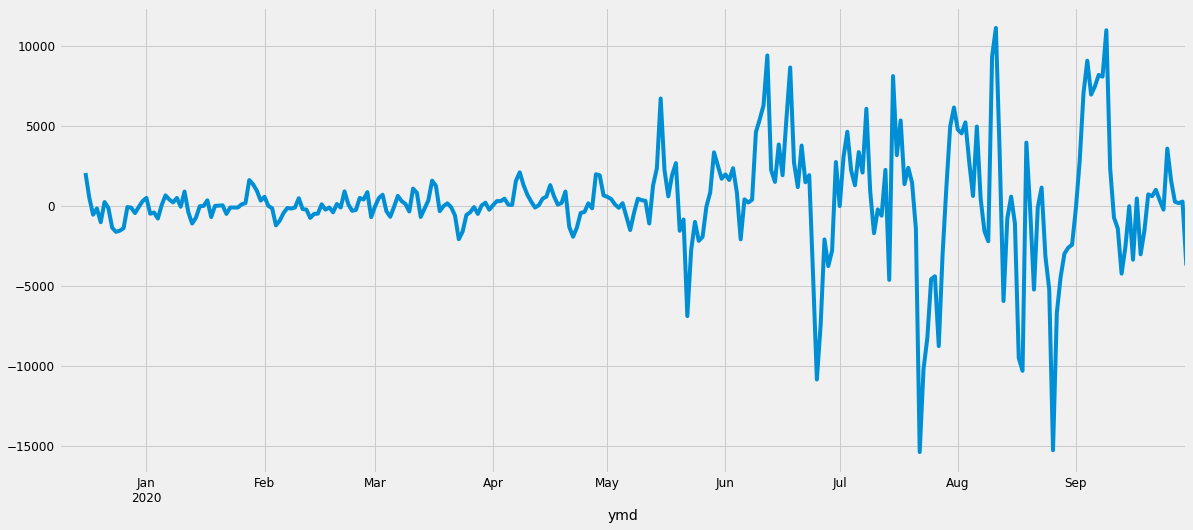

In [897]:
diffTotalByDay['amount'].plot()


In [898]:
totalByDay.dropna(inplace=True)

In [899]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(totalByDay)

In [900]:
pvalue

0.7020618275391763

In [901]:
totalByDay

,amount
ymd,
2019-12-09,100.0
2019-12-10,1609.0
2019-12-11,2200.0
2019-12-12,2438.0
2019-12-13,1900.0
...,...
2020-09-26,10422.0
2020-09-27,6785.0
2020-09-28,10450.0


In [902]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 0, 1) x (0, 1, 0, 30)
SARIMAX: (0, 1, 0) x (0, 1, 1, 30)
SARIMAX: (0, 1, 0) x (1, 0, 0, 30)


In [903]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(totalByDay,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}30 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30)30 - AIC:6086.91245057806
ARIMA(0, 0, 0)x(0, 0, 1, 30)30 - AIC:5356.687650327227
ARIMA(0, 0, 0)x(0, 1, 0, 30)30 - AIC:5252.055879848915
ARIMA(0, 0, 0)x(0, 1, 1, 30)30 - AIC:4680.499475759333
ARIMA(0, 0, 0)x(1, 0, 0, 30)30 - AIC:5269.217287716376
ARIMA(0, 0, 0)x(1, 0, 1, 30)30 - AIC:5193.411665717299
ARIMA(0, 0, 0)x(1, 1, 0, 30)30 - AIC:4690.100468814855
ARIMA(0, 0, 0)x(1, 1, 1, 30)30 - AIC:4679.7031955665225
ARIMA(0, 0, 1)x(0, 0, 0, 30)30 - AIC:5863.696477345472
ARIMA(0, 0, 1)x(0, 0, 1, 30)30 - AIC:5250.141954121617
ARIMA(0, 0, 1)x(0, 1, 0, 30)30 - AIC:5111.10528308104
ARIMA(0, 0, 1)x(0, 1, 1, 30)30 - AIC:4521.098754609771
ARIMA(0, 0, 1)x(1, 0, 0, 30)30 - AIC:5131.524227190342
ARIMA(0, 0, 1)x(1, 0, 1, 30)30 - AIC:5051.343014381208
ARIMA(0, 0, 1)x(1, 1, 0, 30)30 - AIC:4565.447407562275
ARIMA(0, 0, 1)x(1, 1, 1, 30)30 - AIC:4522.597122182409
ARIMA(0, 1, 0)x(0, 0, 0, 30)30 - AIC:5483.893299375739
ARIMA(0, 1, 0)x(0, 0, 1, 30)30 - AIC:4957.759214573762
ARIMA(0, 1,

In [ ]:
from tbats import TBATS, BATS

estimator = TBATS(seasonal_periods=(7, 30))
model = estimator.fit(totalByDay)
# Forecast 365 days ahead


In [980]:
y_forecast = model.forecast(steps=31)

In [981]:
y_forecast.sum()

380972.0053859586

In [939]:
model.aic

5826.860185077836

In [944]:
model.resid

array([-7.69506138e+02,  1.16145456e+03,  8.42646538e+02,  9.01422402e+02,
        4.14584962e+02, -3.82525096e+02,  4.30745603e+02,  6.81691008e+02,
        1.13469760e+01, -1.52173312e+02,  4.40230073e+02, -7.97615991e+02,
        2.34800354e+02,  2.24729205e+02, -4.32542815e+02, -6.88820826e+02,
       -6.59056364e+02,  5.11223557e+02,  1.00938752e+02,  5.11258368e+02,
        4.47454203e+01,  8.38878117e+01, -1.44376023e+02, -2.08341805e+02,
       -4.26286311e+02, -1.00964229e+02, -2.29463172e+02,  3.20697438e+02,
        6.73714982e+02, -1.13275752e+01, -2.08862215e+02, -1.65256322e+02,
       -5.12295176e+02,  6.45159785e+02, -4.61600117e+02, -6.72984322e+01,
       -2.03628025e+02,  2.61679156e+02,  1.02960811e+02,  9.34775156e+01,
       -7.92895164e+01, -1.28173319e+02,  2.52997045e+01,  1.10468593e+01,
       -1.32380597e+02,  4.19009329e+02,  1.31380543e+02, -3.17096490e+01,
        4.31861394e+01,  1.45781614e+02,  1.55850235e+03,  6.15106886e+02,
        6.39068429e+02, -

In [853]:
y_forecast.sum()

351150.87620191555

In [854]:
model.aic

5360.781077720985

In [690]:
model.summary()

'Use Box-Cox: True\nUse trend: False\nUse damped trend: False\nSeasonal periods: [ 7. 30.]\nSeasonal harmonics [3 1]\nARMA errors (p, q): (2, 1)\nBox-Cox Lambda 0.149941\nSmoothing (Alpha): 0.233108\nSeasonal Parameters (Gamma): [-1.85405045e-05  5.29313906e-07 -5.39856361e-05  2.03132596e-05]\nAR coefficients [-5.39856361e-05  2.03132596e-05]\nMA coefficients [0.3019371]\nSeed vector [11.67981253 -0.52060584  0.17328842  0.17302471  0.86740083  0.42420378\n  0.25772334  0.2243118   0.61450582  0.          0.          0.        ]\n\nAIC 5826.860185'

In [856]:
totalByDay

,amount
ymd,
2020-01-01,600.0
2020-01-02,400.0
2020-01-03,400.0
2020-01-04,200.0
2020-01-05,500.0
...,...
2020-09-26,10422.0
2020-09-27,6785.0
2020-09-28,10450.0


In [717]:
df_prophet=totalByDay
df_prophet['ds']= pd.to_datetime(df_prophet.index)

In [730]:
df_prophet=df_prophet.rename(columns = {'amount':'y'})

In [731]:
df_prophet

,y,ds
ymd,,
2019-12-09,100.0,2019-12-09
2019-12-10,1609.0,2019-12-10
2019-12-11,2200.0,2019-12-11
2019-12-12,2438.0,2019-12-12
2019-12-13,1900.0,2019-12-13
...,...,...
2020-09-26,10422.0,2020-09-26
2020-09-27,6785.0,2020-09-27
2020-09-28,10450.0,2020-09-28


In [983]:
from prophet import Prophet
model = Prophet()
# fit the model
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [742]:
future = model.make_future_dataframe(periods=31)
future.tail()

,ds
323,2020-10-27
324,2020-10-28
325,2020-10-29
326,2020-10-30
327,2020-10-31


In [744]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
323,2020-10-27,14783.619199,11215.871768,18701.772860
324,2020-10-28,14888.475977,11080.013876,18588.929660
325,2020-10-29,14428.383431,10594.368276,17881.535386
326,2020-10-30,14188.900743,10482.693923,17655.582605
327,2020-10-31,12709.422975,9169.402310,16241.707162


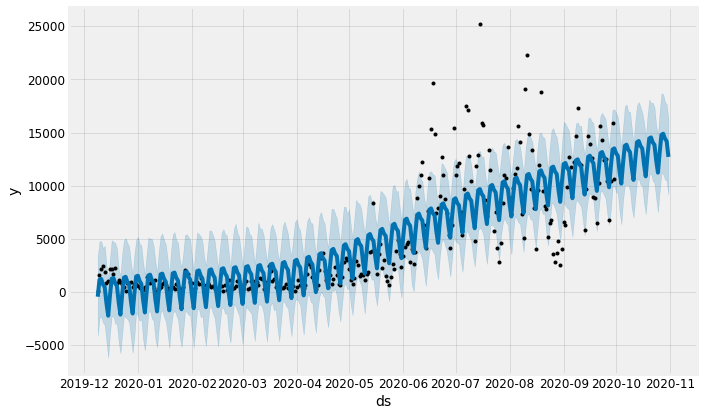

In [746]:
fig1 = model.plot(forecast)

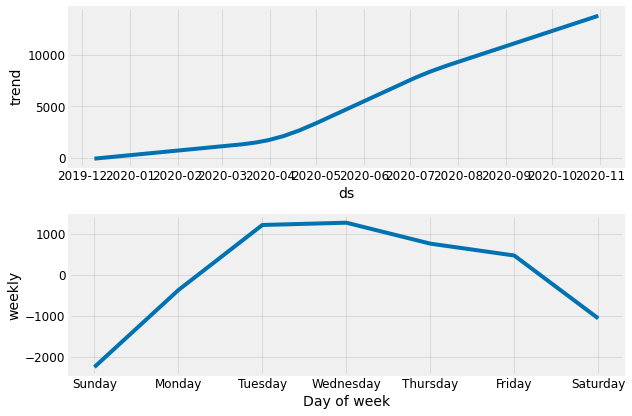

In [748]:
fig2 = model.plot_components(forecast)


In [988]:
forecast.tail(31)['yhat'].sum()

404278.0224984956